In [1]:
import torch
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv
load_dotenv()

from utils import calculate_mean_and_std
from dataset import MolLevelDataset
from model import DescriptorContrastiveModel
from train import train

In [2]:
data_path = os.getenv("DATA_PATH")
models_path = os.getenv("MODELS_PATH")

In [3]:
scaler = calculate_mean_and_std(os.path.join(data_path, "qm9_data"))
data = MolLevelDataset(os.path.join(data_path, "similar_mol.json"), scaler)

# Model
model = DescriptorContrastiveModel(input_dim=18)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Training
losses = train(model, data, optimizer, device, model_name="DESCRIPTOR_LEVEL_MODEL", epochs=4)

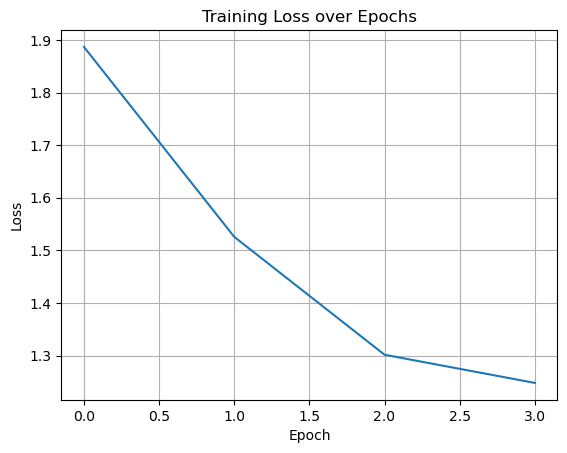

In [4]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()